In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dense
# from keras.layers import Bidirectional
# from keras.layers import Flatten
# from keras.layers import TimeDistributed
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
from fbprophet import Prophet
from pyod.models.knn import KNN
from tqdm import tqdm

In [2]:
# !pip install pyod

In [2]:
df = pd.read_excel("C:/Users/Srikar Verma/Desktop/iit bhu/projects and competitions/projects_venv/datathon/trainset.xlsx", index_col="Region_Name")
dfr = df.T
dfr.rename(columns={"Region_Name":"Month"}, inplace=True)
dfr.insert(0, "Date", np.arange(1, 73))
dfr.reset_index(inplace=True)
dfr.drop(columns=["index"], inplace=True)
#dfr.head()

In [3]:
date_col = []
for i in range(6):
    for j in range(12):
        date_col.append(str(2013+i)+'-'+str(j+1))
date_col = pd.to_datetime(date_col)
dfr['Date'] = date_col


In [4]:
predicted = pd.DataFrame()
type(predicted)
#predicted_csv = predicted_csv.to_frame()

pandas.core.frame.DataFrame

In [5]:
def _remove_outliers(i):
    y = dfr.iloc[:, [i, 0]]
    Y = np.array(dfr.iloc[:, [i]]).reshape(-1, 1)
    clf = KNN()
    clf.fit(Y)
    outliers = clf.predict(Y)
    where_out = np.where(outliers==1)
    for idx in where_out:
        Y[idx] = Y[idx - 1]
    y.iloc[:, 0] = Y
    y.columns = ['y', 'ds']
    return y

In [6]:
def remove_outliers(i):
    #print("region number:", i)
    #reg_data = dfr.iloc[:, [0, i]]
    y = dfr.iloc[:, [i, 0]]
    Y = np.array(y.iloc[:, [0]]).reshape(-1, 1)
    clf = KNN()
    clf.fit(Y)
    outliers = clf.predict(Y)
    where_out = np.where(outliers==1)
    for idx in where_out:
        Y[idx] = np.NaN
    y.iloc[:, 0] = Y
    y.columns = ['y', 'ds']
    y.dropna(inplace = True)
    return y

In [7]:
remove_outliers(50).shape
# series = dfr.iloc[:72, [50, 0]]
# series

C:\Users\Srikar Verma\anaconda3\envs\pythonProject1\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Srikar Verma\anaconda3\envs\pythonProject1\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(66, 2)

In [8]:
#Y_inliers = Y[np.where(outliers==0)]
#Y_inliers

In [9]:
print(dfr.head())
dfr.iloc[:, 1]

Region_Name       Date  Region 1  Region 2  Region 3  Region 4  Region 5  \
0           2013-01-01  0.154325  0.119708  0.178236  0.225016  0.318976   
1           2013-02-01  0.122901  0.119831  0.165497  0.220602  0.316835   
2           2013-03-01  0.127583  0.112970  0.190754  0.224240  0.328486   
3           2013-04-01  0.501557  0.326049  0.321733  0.330916  0.483001   
4           2013-05-01  0.103551  0.098852  0.203126  0.268934  0.380898   

Region_Name  Region 6  Region 7  Region 8  Region 9  ...  Region 3906  \
0            0.049922  0.219802  0.069055  0.186616  ...     0.154372   
1            0.082337  0.175329  0.059602  0.185539  ...     0.180818   
2            0.083182  0.178562  0.071814  0.207523  ...     0.407456   
3            0.156701  0.245769  0.123014  0.364449  ...     0.403261   
4            0.013289  0.139204  0.078820  0.165327  ...     0.334762   

Region_Name  Region 3907  Region 3908  Region 3909  Region 3910  Region 3911  \
0               0.338739

0     0.154325
1     0.122901
2     0.127583
3     0.501557
4     0.103551
        ...   
67    0.234171
68    0.294693
69    0.373754
70    0.333642
71    0.242176
Name: Region 1, Length: 72, dtype: float64

In [10]:
# m = Prophet(interval_width = 0.95, weekly_seasonality = False, daily_seasonality = False)
# m.add_seasonality(name='monthly', period=30, fourier_order = 5)
# region = 40
# predicted = pd.DataFrame()
# series = remove_outliers(40)
# series = dfr.iloc[:60, [region, 0]]
# series1 = dfr.iloc[:, [region, 0]]
# print(type(series))
# series.columns = ['y', 'ds']
# series1.columns = ['y', 'ds']
# series1.set_index('ds', drop=True, inplace=True)
# model = m.fit(series)
# future = m.make_future_dataframe(periods=15, freq='MS')
# forecast = m.predict(future)
# #series.set_index('ds', drop=True, inplace=True)
# m.plot(forecast)
# #m.plot(series)
# # predicted["ds"] = forecast["ds"]
# # predicted["yhat"] = forecast["yhat"]
# # #print(predicted)
# # predicted.set_index("ds", drop = True, inplace = True)
# # fig1, ax1 = plt.subplots()
# # _, ax2 = plt.subplots()
# # ax1.plot(series1["y"], series1["ds"], label='Signal 1', c='g')
# # ax2.plot(series1["y"], predicted["ds"],  label='Signal 2', c='r')
# # plt.plot(series1)
# # plt.plot(predicted)
# # predicted.plot(figsize = (20, 5), color = "blue")
# # series1.plot(figsize = (20, 5), color = "green")
# plt.show()

In [11]:
# m = Prophet(interval_width = 0.95, weekly_seasonality = False, daily_seasonality = True)
# #m.add_seasonality(name='monthly', period=30, fourier_order = 5)
# region = 1000
# predicted = pd.DataFrame()
# seriesx = remove_outliers(40)
# series = dfr.iloc[:72, [region, 0]]
# #series1 = dfr.iloc[:72, [region, 0]]
# series.columns = ['y', 'ds']
# # series1.columns = ['y', 'ds']
# # series1.set_index('ds', drop=True, inplace=True)
# model = m.fit(series)
# periods = 15
# future = m.make_future_dataframe(periods=15, freq='MS')
# forecast = m.predict(future)
# #series.set_index('ds', drop=True, inplace=True)
# m.plot(forecast)
# # m.plot(series)
# predicted["ds"] = forecast["ds"]
# predicted["yhat"] = forecast["yhat"]
# #print(predicted)
# predicted.set_index("ds", drop = True, inplace = True)
# print(forecast["yhat"])
# # fig1, ax1 = plt.subplots()
# # _, ax2 = plt.subplots()
# # ax1.plot(series1["y"], series1["ds"], label='Signal 1', c='g')
# # ax2.plot(series1["y"], predicted["ds"],  label='Signal 2', c='r')
# # plt.plot(series1)
# # plt.plot(predicted)
# # predicted.plot(figsize = (20, 5), color = "blue")
# # series1.plot(figsize = (20, 5), color = "green")
# plt.show()

In [12]:
def train_and_forecast(series, upto_month = 72, periods = 15, interval_width = 0.95, daily_seasonality = True, weekly_seasonality = False):
    m = Prophet(interval_width = 0.95, weekly_seasonality = weekly_seasonality, daily_seasonality = daily_seasonality)
    #m.add_seasonality(name='monthly', period=30, fourier_order = 5)
    model = m.fit(series)
    future = m.make_future_dataframe(periods=15, freq='MS')
    forecast = m.predict(future)
    m.plot(forecast)
    #print(forecast["yhat"].shape)
    return forecast["yhat"]

In [13]:
# #dfr.set_index("Date", inplace=True)
# series = dfr.iloc[:, [3, 0]]
# series.columns = ['y', 'ds']
# y = train_and_forecast(series)
# #series


In [14]:
unrelated = np.load("unrelated8.npy", allow_pickle=True)

  0%|          | 0/261 [00:00<?, ?it/s]C:\Users\Srikar Verma\anaconda3\envs\pythonProject1\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Srikar Verma\anaconda3\envs\pythonProject1\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
  0%|          | 1/261 [00:17<1:16:33, 17.67s/it]C:\Users\Srikar Verma\anaconda3\envs\pythonProject1\lib\site-packages\pandas\core\indexing.py:1835:

KeyboardInterrupt: 

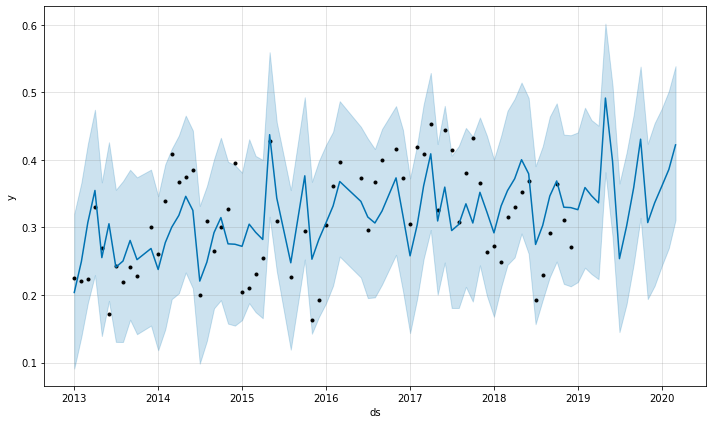

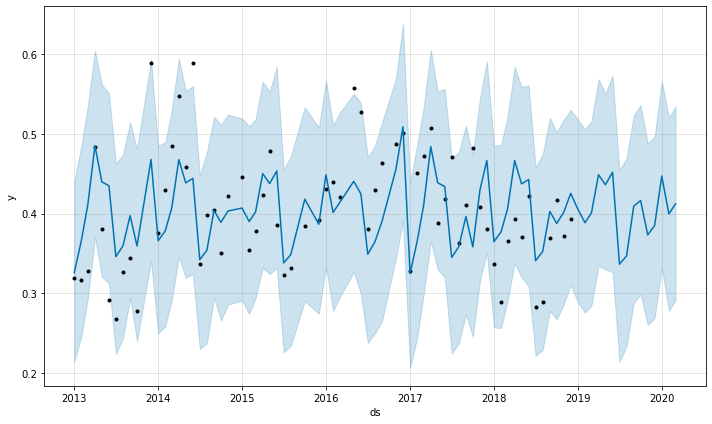

In [15]:
# c = 0
# start = 300
# end = 302
# mark = 10
predicted = pd.DataFrame()
for i in tqdm(unrelated):
    series = remove_outliers(i)
    predicted["Region "+str(i)] = train_and_forecast(series, upto_month = 72, periods = 15, interval_width = 0.95, daily_seasonality = True, weekly_seasonality = False)

In [ ]:
c = 0
start = 300
end = 302
mark = 10
predicted = pd.DataFrame()
for i in tqdm(range(start, end)):
    series = remove_outliers(i)
    predicted["Region "+str(i)] = train_and_forecast(series, upto_month = 72, periods = 15, interval_width = 0.95, daily_seasonality = True, weekly_seasonality = False)

In [ ]:
def reorder(i, df):
    y = df.iloc[:, i]
    


In [105]:
# # csv_name = "prophet_predicted(" + str(start) + "-" + str(end) + ").csv" 
# # predicted.to_csv(csv_name)
# #print(predicted)
# y1 = train_and_forecast(remove_outliers(10), upto_month = 72, periods = 15, interval_width = 0.95, daily_seasonality = True, weekly_seasonality = False)
# # y2 = train_and_forecast(remove_outliers(11), upto_month = 72, periods = 15, interval_width = 0.95, daily_seasonality = True, weekly_seasonality = False)
# # y3 = train_and_forecast(remove_outliers(12), upto_month = 72, periods = 15, interval_width = 0.95, daily_seasonality = True, weekly_seasonality = False)
# y4 = train_and_forecast(remove_outliers(1000), upto_month = 72, periods = 15, interval_width = 0.95, daily_seasonality = True, weekly_seasonality = False)
# print(y1[0], y4[0])
# print("yo")

region number: 10
[10 35 40 45 57]


C:\Users\Srikar Verma\anaconda3\envs\pythonProject1\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Srikar Verma\anaconda3\envs\pythonProject1\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


region number: 1000
[18 30 52 54]


C:\Users\Srikar Verma\anaconda3\envs\pythonProject1\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Srikar Verma\anaconda3\envs\pythonProject1\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


0.02042703810165915 0.41711983270051783
yo


In [ ]:
csv_name = "prophet_predicted(" + str(start) + "-" + str(end) + ").csv"
predicted.to_csv(csv_name)